# Unit 1

In [18]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

array

array([-1.40682457e-03, -4.46077698e-04, -4.10981564e-04, ...,
        7.96230779e-06, -3.04169989e-05,  1.27650665e-05], dtype=float32)

In [2]:
sampling_rate


22050

In [19]:
y, sr = librosa.load("G:\\My Drive\\_Media\\Music\\E\\Entombed\\Morning Star\\01 Chief Rebel Angel.mp3")


Estimated tempo: 99.38 beats per minute


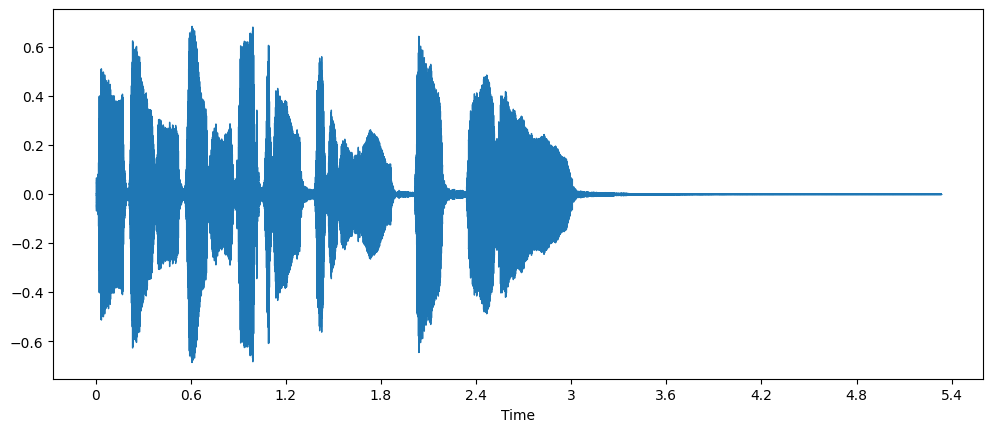

In [3]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

# Frequency Domain

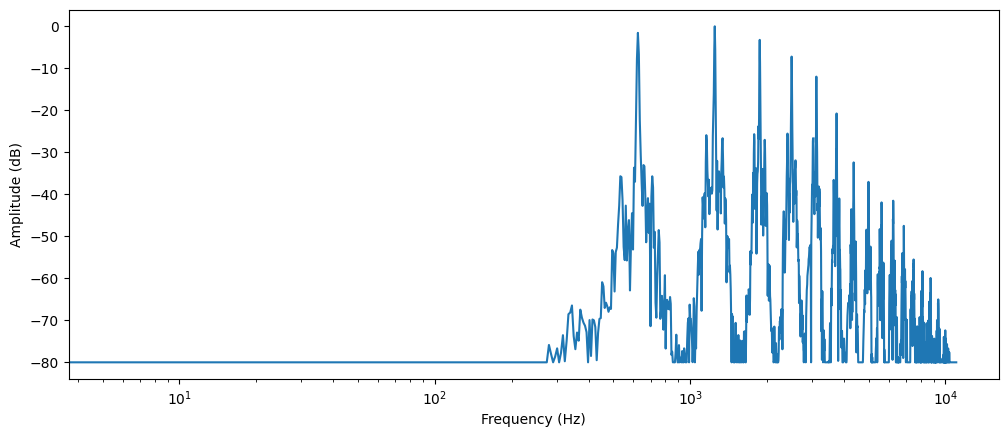

In [4]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft) # Takes real component
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# Spectrogram
 The spectrogram was generated by a machine learning model, it typically only outputs the amplitudes. In that case, we can use a phase reconstruction algorithm such as the classic Griffin-Lim algorithm, or using a neural network called a vocoder, to reconstruct a waveform from the spectrogram.

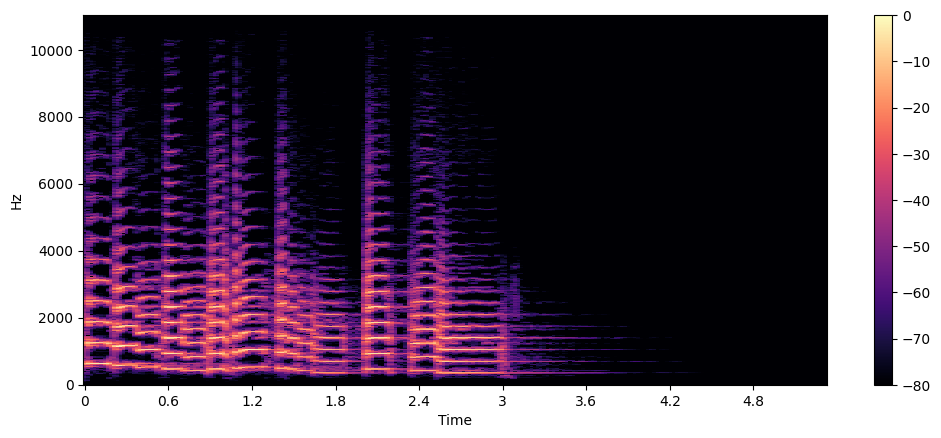

In [5]:
import numpy as np

D = librosa.stft(array) #2048 spectral segments of 2048
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

# Mel Spectrogram
The mel scale is a perceptual scale that approximates the non-linear frequency response of the human ear.

To create a mel spectrogram, the STFT is used just like before, splitting the audio into short segments to obtain a sequence of frequency spectra. Additionally, each spectrum is sent through a set of filters, the so-called mel filterbank, to transform the frequencies to the mel scale.

The mel bands define a set of frequency ranges that divide the spectrum into perceptually meaningful components, using a set of filters whose shape and spacing are chosen to mimic the way the human ear responds to different frequencies. Common values for n_mels are 40 or 80. fmax indicates the highest frequency (in Hz) we care about.

Lossy Operation
Can be more meaniful for human perception.

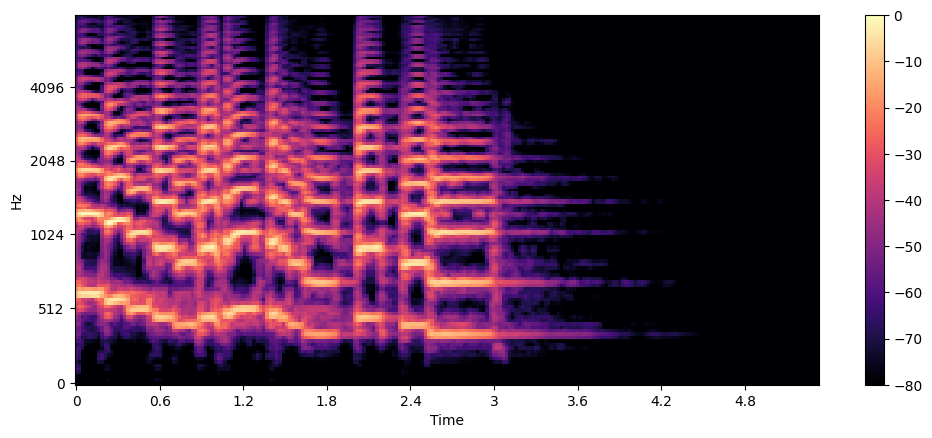

In [6]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000) # n_mels - numbers of mel bands to generatre
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

### Load and explore an audio dataset
MINDS-14

In [7]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

g:\My Drive\Code\huggingface_audio_train\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [8]:
example = minds[0]
example

{'path': 'C:\\Users\\mflem\\.cache\\huggingface\\datasets\\downloads\\extracted\\688368b92889532ade4da58072c40c19121285ad115772d0ed428d6578e726e4\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\mflem\\.cache\\huggingface\\datasets\\downloads\\extracted\\688368b92889532ade4da58072c40c19121285ad115772d0ed428d6578e726e4\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [9]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [10]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [ ]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

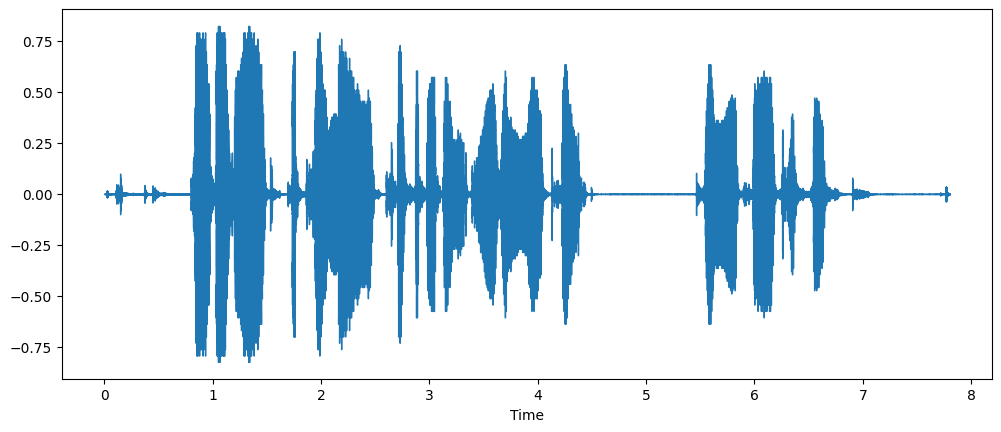

In [11]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [12]:
from datasets import Audio

minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [13]:
minds[0]

{'path': 'C:\\Users\\mflem\\.cache\\huggingface\\datasets\\downloads\\extracted\\688368b92889532ade4da58072c40c19121285ad115772d0ed428d6578e726e4\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\mflem\\.cache\\huggingface\\datasets\\downloads\\extracted\\688368b92889532ade4da58072c40c19121285ad115772d0ed428d6578e726e4\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([2.36120541e-05, 1.92325111e-04, 2.19284673e-04, ...,
         9.40908678e-04, 1.16613181e-03, 7.20883720e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

# Unit 2

In [20]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [21]:
from transformers import pipeline

classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

ModuleNotFoundError: No module named 'transformers'